![title](image/ntu_logo.png)

# CZ1015 MiniProject: Introduction to Data Science and Artificial Intelligence

# Accidental Aviation Dataset Report

- A program coded in **Python** that analysis accidents characteristics using AccidentalAviation dataset. It is containing different accidents with respect to various different factors  

Made by: 

### Tran Anh Tai - U1820351C

### Sim Tian Quan - U1921887D

### Muhammad Nasran Hamza - U1921348G

### Kundu Koushani - U1922997B

### Group: FS406

# Problem Statement:

## To find out the factors to take into consideration when manufacturing aircrafts that will be less prone to accidents.


## 1. Predict the make with the least number of accidents.

## 2. Predict the severity of the accidents.

## 3. Which accident(s) are outliers compared to others. 

# Importing all important libraries required for data exploration

In [2]:
# Importing all the project pre-requisites
import math
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.cluster import DBSCAN

# Visualization for classification tree
import graphviz

# Import essential models and functions from plotly
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

ModuleNotFoundError: No module named 'graphviz'

# Import the Accidental Aviation Dataset

### Vital statistics of the dataset using type and shape attribute

In [3]:
# import data set to the colab notebook
data = pd.read_csv("AviationDataUP_edited.csv")
# data cleaning
data.columns = data.columns.str.upper() # change all co 
data.columns = data.columns.str.replace(".", "_")
# print basic information for the data frame
print("Data type : ", type(data))
print("Data dims : ", data.shape)
# first 5 records in the data frame
data.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (79141, 22)


,EVENT_DATE,LOCATION,COUNTRY,LATITUDE,LONGITUDE,AIRPORT_CODE,AIRPORT_NAME,INJURY_SEVERITY,AIRCRAFT_DAMAGE,AIRCRAFT_CATEGORY,...,AMATEUR_BUILT,NUMBER_OF_ENGINES,ENGINE_TYPE,PURPOSE_OF_FLIGHT,TOTAL_FATAL_INJURIES,TOTAL_SERIOUS_INJURIES,TOTAL_MINOR_INJURIES,TOTAL_UNINJURED,WEATHER_CONDITION,BROAD_PHASE_OF_FLIGHT
0,14/11/2016,"Winton, New Zealand",New Zealand,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Helicopter,...,No,1.0,Turbo Shaft,NaN,NaN,NaN,NaN,1.0,NaN,MANEUVERING
1,14/11/2016,"Albrook, Panama",Panama,NaN,NaN,MPMG,Marcos A. Gelabert Intl.,Non-Fatal,Substantial,Airplane,...,No,NaN,NaN,NaN,NaN,NaN,NaN,2.0,VMC,LANDING
2,13/11/2016,"Port Allen, LA",United States,30.532500,-91.3150,LA46,OMNI,Non-Fatal,Substantial,Airplane,...,No,1.0,Reciprocating,Personal,NaN,NaN,NaN,1.0,VMC,TAKEOFF
3,12/11/2016,"Taylor, AZ",United States,34.454722,-110.0575,NaN,NaN,Non-Fatal,Substantial,Airplane,...,No,1.0,Reciprocating,Instructional,NaN,NaN,NaN,2.0,VMC,MANEUVERING
4,12/11/2016,"Pleasanton, TX",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Airplane,...,No,1.0,Reciprocating,Personal,NaN,1.0,NaN,1.0,VMC,NaN


# Exploratory Data Analysis / Visualization

# Basic statistics

In [4]:
# data general information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79141 entries, 0 to 79140
Data columns (total 22 columns):
EVENT_DATE                79141 non-null object
LOCATION                  79063 non-null object
COUNTRY                   78634 non-null object
LATITUDE                  25614 non-null float64
LONGITUDE                 25605 non-null float64
AIRPORT_CODE              44577 non-null object
AIRPORT_NAME              47348 non-null object
INJURY_SEVERITY           79141 non-null object
AIRCRAFT_DAMAGE           76742 non-null object
AIRCRAFT_CATEGORY         22324 non-null object
MAKE                      79052 non-null object
MODEL                     79023 non-null object
AMATEUR_BUILT             78573 non-null object
NUMBER_OF_ENGINES         75056 non-null float64
ENGINE_TYPE               75779 non-null object
PURPOSE_OF_FLIGHT         75288 non-null object
TOTAL_FATAL_INJURIES      55944 non-null float64
TOTAL_SERIOUS_INJURIES    53724 non-null float64
TOTAL_MINOR_INJURIES  

In [5]:
# numerical data statistics description
data.describe()

,LATITUDE,LONGITUDE,NUMBER_OF_ENGINES,TOTAL_FATAL_INJURIES,TOTAL_SERIOUS_INJURIES,TOTAL_MINOR_INJURIES,TOTAL_UNINJURED
count,25614.000000,25605.000000,75056.000000,55944.000000,53724.000000,54812.000000,66860.000000
mean,37.703398,-93.777278,1.147970,0.814082,0.317381,0.501806,5.781050
std,12.104792,39.207853,0.453804,6.235832,1.373004,2.780169,29.207045
min,-78.016945,-178.676111,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.384166,-114.997222,1.000000,0.000000,0.000000,0.000000,0.000000
50%,38.182916,-94.498055,1.000000,0.000000,0.000000,0.000000,1.000000
75%,42.568125,-81.731667,1.000000,1.000000,0.000000,1.000000,2.000000
max,89.218056,177.557778,18.000000,349.000000,111.000000,380.000000,699.000000


In [6]:
# for categorical value
categorical = pd.DataFrame(data).select_dtypes(exclude = [np.number])
categorical.describe()

,EVENT_DATE,LOCATION,COUNTRY,AIRPORT_CODE,AIRPORT_NAME,INJURY_SEVERITY,AIRCRAFT_DAMAGE,AIRCRAFT_CATEGORY,MAKE,MODEL,AMATEUR_BUILT,ENGINE_TYPE,PURPOSE_OF_FLIGHT,WEATHER_CONDITION,BROAD_PHASE_OF_FLIGHT
count,79141,79063,78634,44577,47348,79141,76742,22324,79052,79023,78573,75779,75288,77012,73087
unique,12596,25228,177,9622,22729,124,3,13,7452,11304,2,14,22,3,12
top,8/7/2000,"ANCHORAGE, AK",United States,NONE,PRIVATE,Non-Fatal,Substantial,Airplane,CESSNA,152,No,Reciprocating,Personal,VMC,LANDING
freq,25,372,74616,1464,215,59929,56939,19138,17071,2274,70975,64480,44469,70390,19151


## USA states visualization

- As observed on the table above, **USA** is the country with highest accidents records in the table.

- Hence, this part will visualize the **states** of USA occured on the map that occured in some records.

- When hovers the mouse on each states, it will show which this state is in terms of state abbreviation with 2 letters (e.g NY : New York)

In [7]:
# top five event date with the accidents
USA_loc = data["LOCATION"].value_counts().to_frame().head(1000)
USA_loc = USA_loc.reset_index()
USA_loc.columns = ["STATE", "COUNT"]
states = list(USA_loc["STATE"])
fig = px.choropleth(locations = [i[len(i) - 2:len(i):] for i in states], locationmode="USA-states", color=[i for i in range(1, 1001)], scope="usa")
fig.show()

NameError: name 'px' is not defined

## Date statistics

In [8]:
# top five event date with the accidents
data["EVENT_DATE"].value_counts().to_frame().head(5)

,EVENT_DATE
8/7/2000,25
30/6/1984,25
16/5/1982,25
25/8/1984,24
5/6/1983,24


## Phase of flight and weather condition visualization 

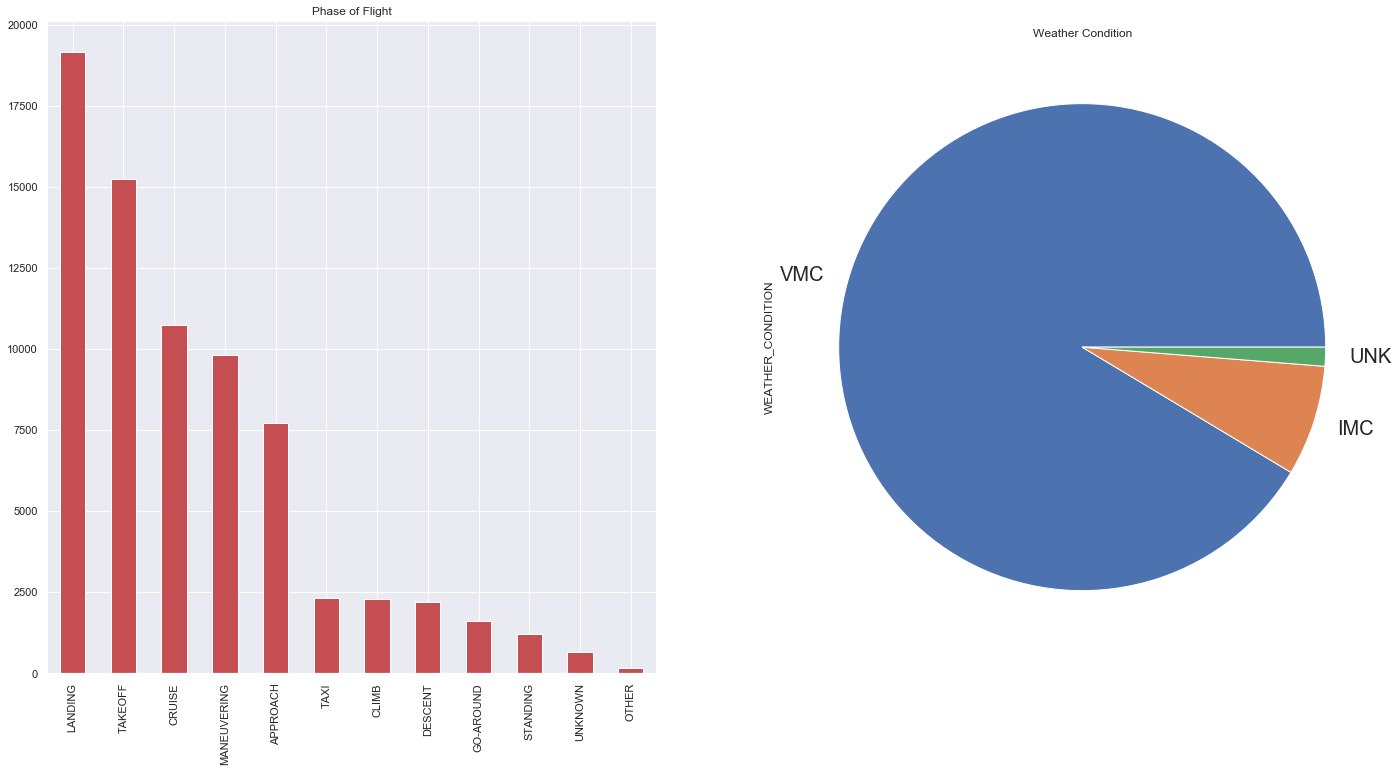

In [9]:
fig, axes = plt.subplots(1, 2, figsize = (24, 12))
data["BROAD_PHASE_OF_FLIGHT"].value_counts().plot(ax = axes[0], kind = 'bar', title = 'Phase of Flight',color = 'r')
data["WEATHER_CONDITION"].value_counts().plot(ax = axes[1], kind = 'pie', title = 'Weather Condition', fontsize = 20)

## Visualize broad phase of flight with percentage 

<Figure size 1440x1440 with 0 Axes>

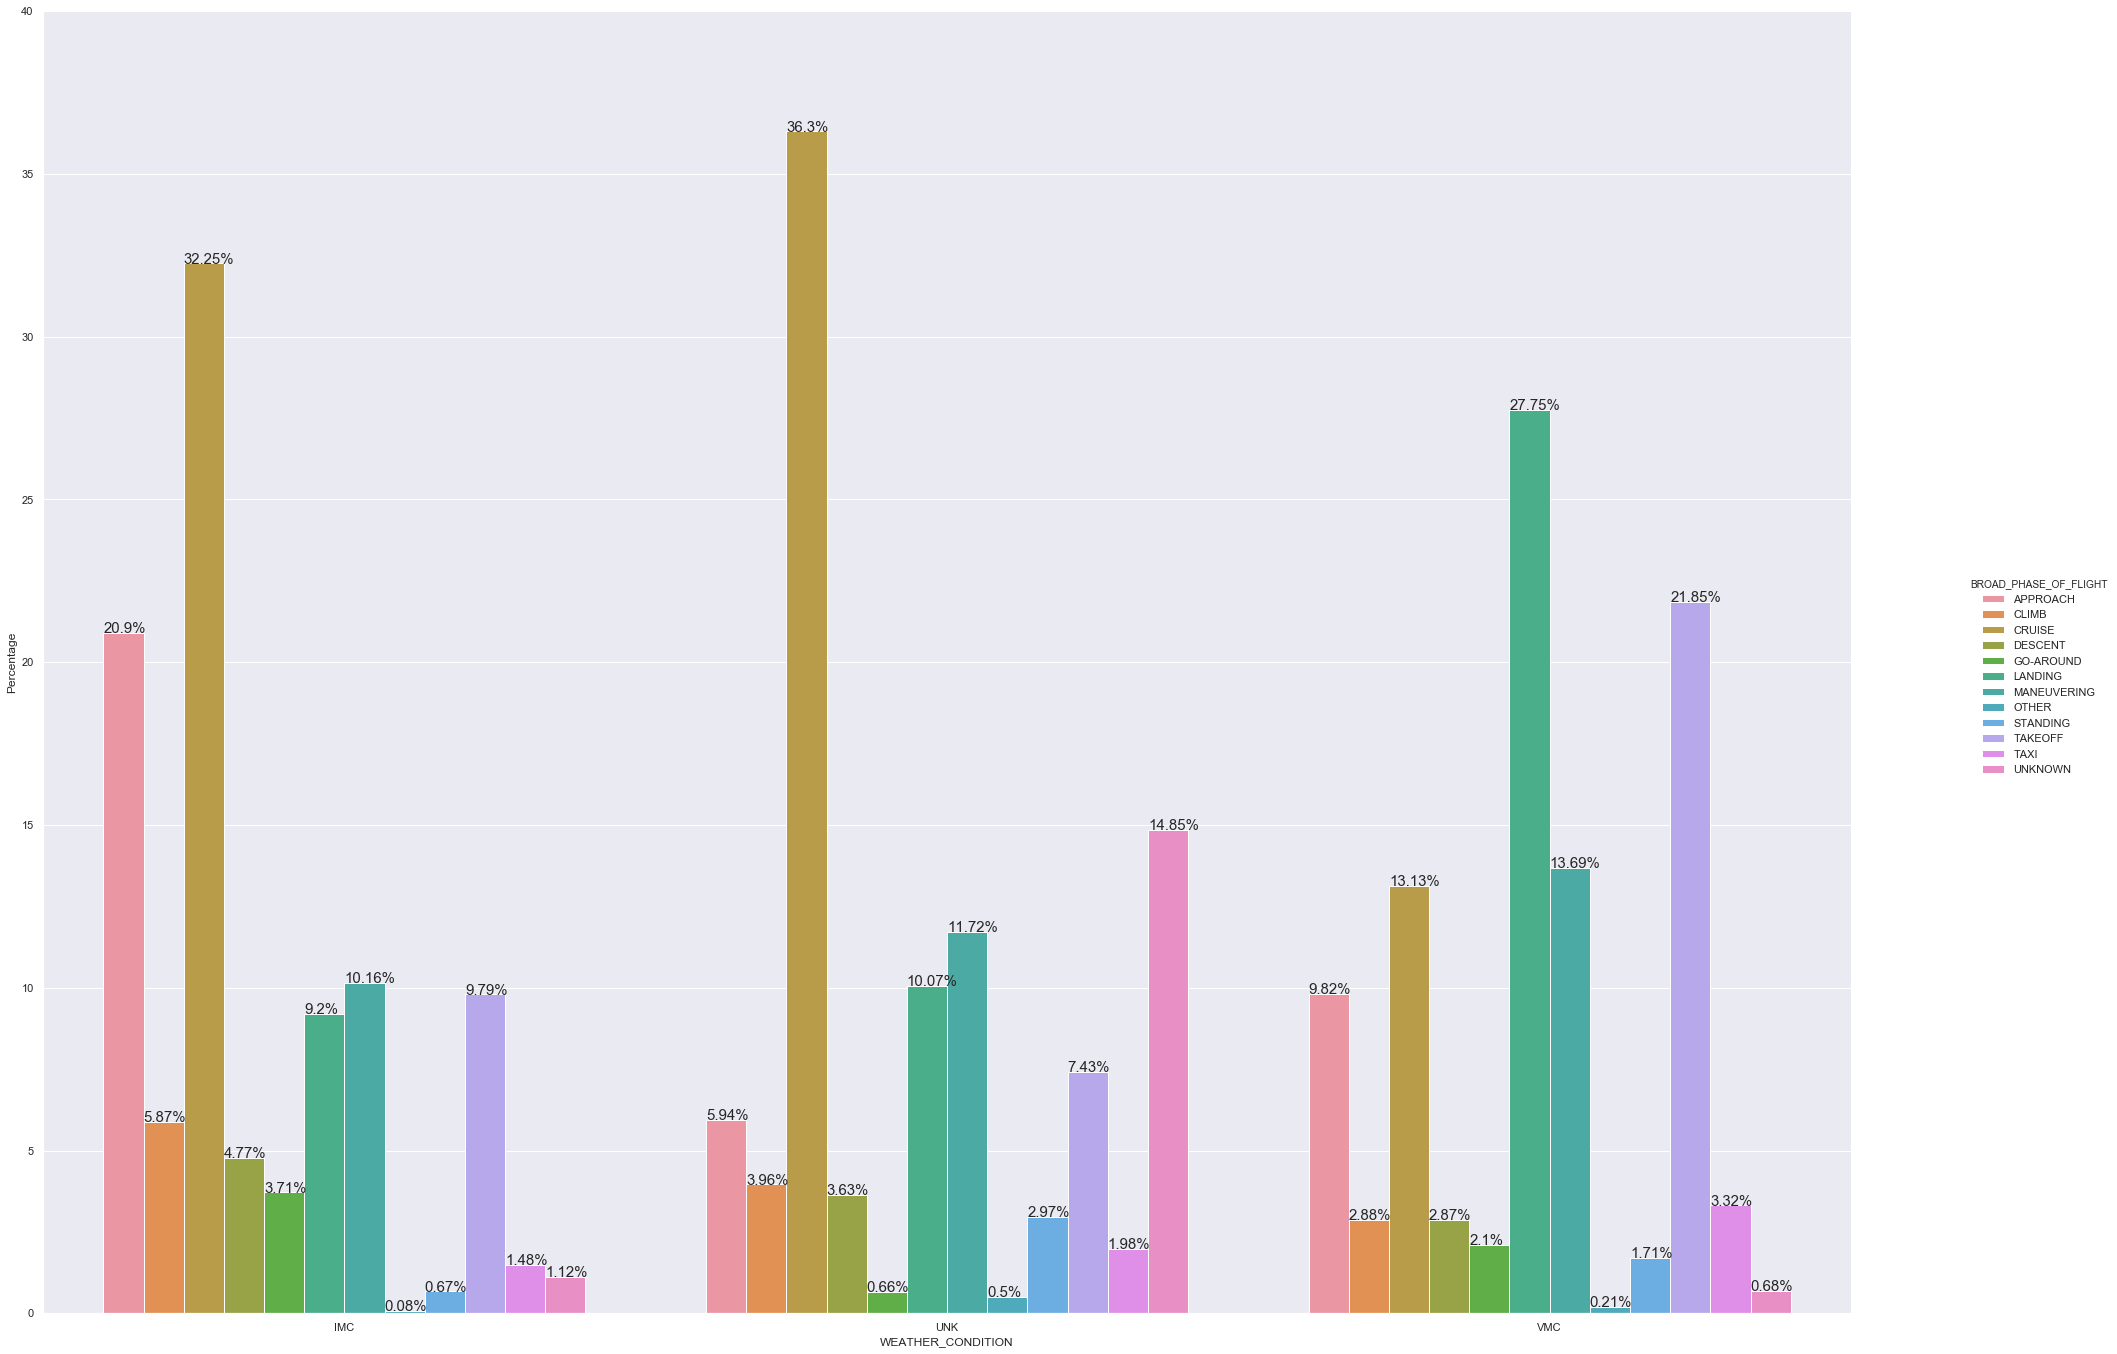

In [10]:
# Visualisation with percentage
x,y = "WEATHER_CONDITION", "BROAD_PHASE_OF_FLIGHT"
wp = data.groupby(x)[y].value_counts(normalize=True)
wp = wp.mul(100)
wp = wp.rename('Percentage').reset_index()
wp = wp.sort_values(by=["WEATHER_CONDITION", "BROAD_PHASE_OF_FLIGHT"])
plt.figure(figsize = (20, 20))
g = sb.catplot(x=x,y='Percentage',hue=y,kind='bar',data=wp, height=8, aspect=2)
g.ax.set_ylim(0,40)

g.fig.set_figheight(20)
g.fig.set_figwidth(30)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt, fontsize = 15)

## Distribution  and data skewness for numerical variables

For the dataset natural, our group recognized 2 types for numerical variables:

- **Continous numerical**

- **Discrete numerical**

## Continuous numerical variables

In [11]:
# discrete numerical data
cNum = pd.DataFrame(data[["LATITUDE", "LONGITUDE"]])
# clean discrete numerical data
cNum.fillna(value = "0", inplace = True) # Fill missing values in data
# Replacing values that contain 'N/A' to a numeric value of 0 to indicate as null instead.
cNum.replace('N/A', 0)
# convert data to integer
cNum = cNum.astype('float')
cNum.head()

,LATITUDE,LONGITUDE
0,0.000000,0.0000
1,0.000000,0.0000
2,30.532500,-91.3150
3,34.454722,-110.0575
4,0.000000,0.0000


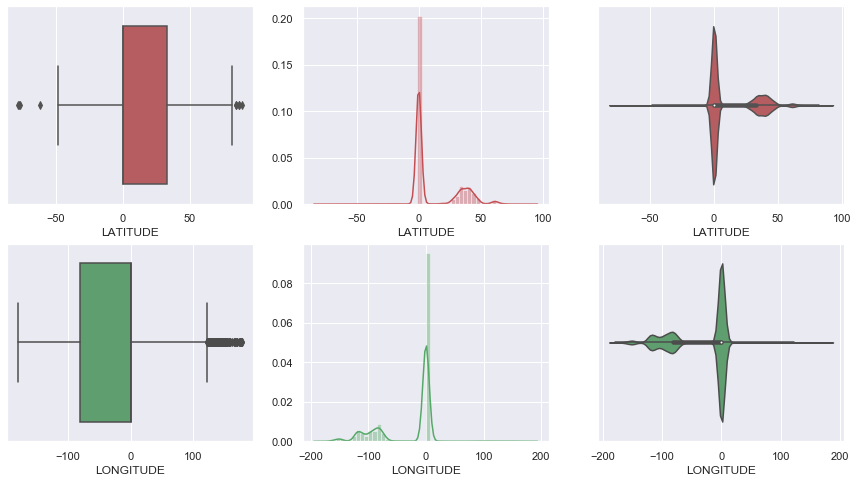

In [12]:
# Draw the distributions of all variables
f, axes = plt.subplots(2, 3, figsize=(15, 8))
colors = ["r", "g"]

count = 0
for var in cNum:
    sb.boxplot(cNum[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(cNum[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(cNum[var], color = colors[count], ax = axes[count,2])
    count += 1

In [13]:
## Skewness of contiuous numerical variables
cols = []
lst = []
val = []
print("Skewness of continous numeric variables")
for var in cNum:
  cols.append(var)
  val.append(cNum[var].skew())
lst.append(val)
cNumSkew = pd.DataFrame(lst, columns=cols)
cNumSkew.head()

Skewness of continous numeric variables


,LATITUDE,LONGITUDE
0,0.978403,-0.825775


## Discrete Numerical variables

In [14]:
# discrete numerical data
dNum = pd.DataFrame(data[["NUMBER_OF_ENGINES","TOTAL_FATAL_INJURIES","TOTAL_SERIOUS_INJURIES","TOTAL_MINOR_INJURIES","TOTAL_UNINJURED"]])

# clean discrete numerical data
# Fill missing values in data
dNum.fillna(value = 0, inplace = True)

# Replacing values that contain 'N/A' to a numeric value of 0 to indicate as null instead.
dNum.replace('N/A', 0)

# convert data to integer
dNum = dNum.astype('int')
dNum.head()


,NUMBER_OF_ENGINES,TOTAL_FATAL_INJURIES,TOTAL_SERIOUS_INJURIES,TOTAL_MINOR_INJURIES,TOTAL_UNINJURED
0,1,0,0,0,1
1,0,0,0,0,2
2,1,0,0,0,1
3,1,0,0,0,2
4,1,0,1,0,1


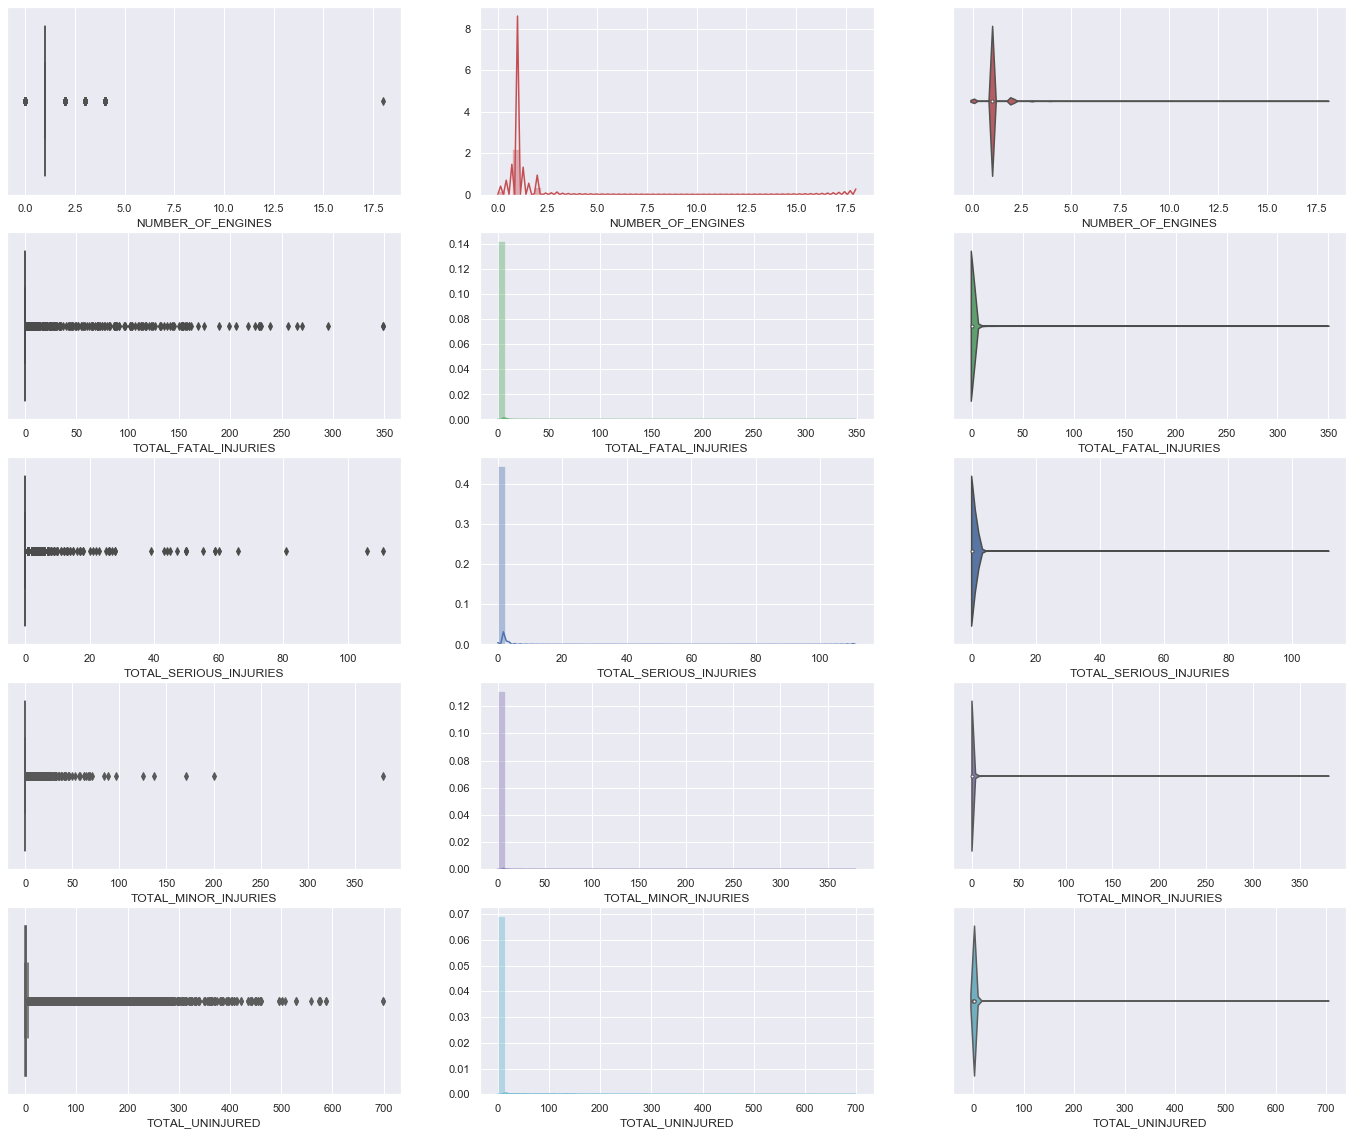

In [15]:
# Draw the distributions of all variables
f, axes = plt.subplots(5, 3, figsize=(24, 20))
colors = ["r", "g", "b", "m", "c"]

count = 0
for var in dNum:
    sb.boxplot(dNum[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(dNum[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(dNum[var], color = colors[count], ax = axes[count,2])
    count += 1

In [16]:
# skewness of discrete numerical variables
cols = []
lst = []
val = []
print("Skewness of discrete numeric variables")
for var in dNum:
    cols.append(var)
    val.append(dNum[var].skew())
lst.append(val)
dNumSkew = pd.DataFrame(lst, columns=cols)
dNumSkew.head()

Skewness of discrete numeric variables


,NUMBER_OF_ENGINES,TOTAL_FATAL_INJURIES,TOTAL_SERIOUS_INJURIES,TOTAL_MINOR_INJURIES,TOTAL_UNINJURED
0,1.830708,34.972586,44.581533,79.49861,9.764464


## Correlation matrix between each numerical variables in the dataset

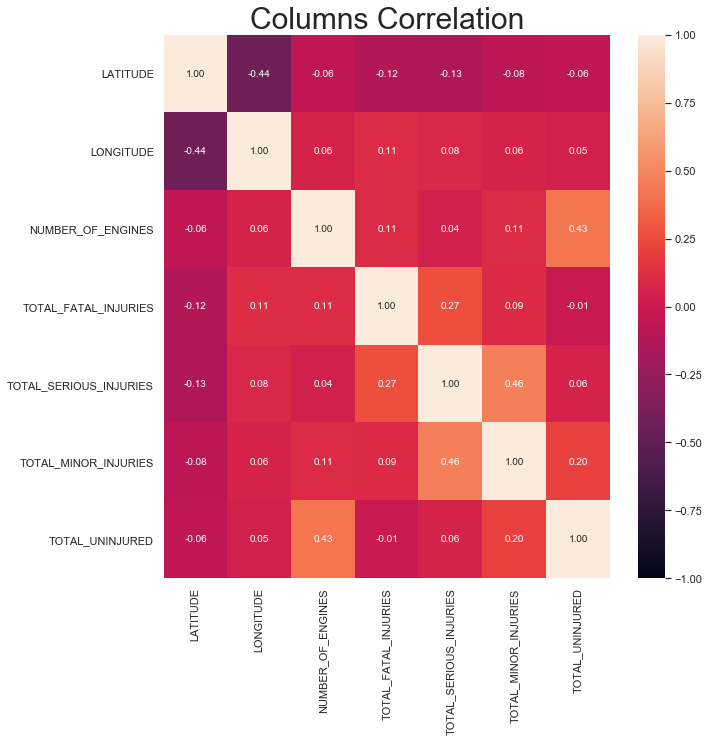

In [16]:
f, axes = plt.subplots(1, 1, figsize = (10, 10))
plt.title("Columns Correlation", fontsize = 30)
sb.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True, fmt = '.2f')

## Pairplot of those discrete numerical variables

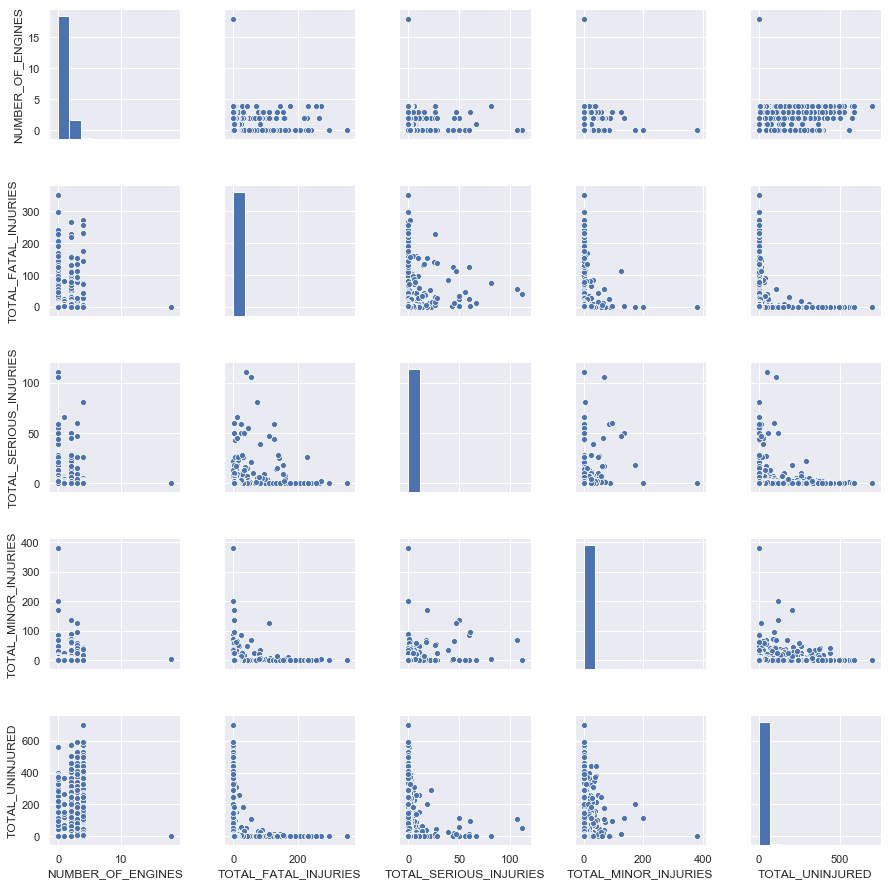

In [18]:
sb.pairplot(dNum)

In [19]:
# Extract the Features from the Data
X = pd.DataFrame(data).select_dtypes([np.number])
# Check the Dataset
X.info()
# clean features X
X.fillna(value = "0", inplace = True) # Fill missing values in data
# Replacing values that contain 'N/A' to a numeric value of 0 to indicate as null instead.
X.replace('N/A', 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79141 entries, 0 to 79140
Data columns (total 7 columns):
LATITUDE                  25614 non-null float64
LONGITUDE                 25605 non-null float64
NUMBER_OF_ENGINES         75056 non-null float64
TOTAL_FATAL_INJURIES      55944 non-null float64
TOTAL_SERIOUS_INJURIES    53724 non-null float64
TOTAL_MINOR_INJURIES      54812 non-null float64
TOTAL_UNINJURED           66860 non-null float64
dtypes: float64(7)
memory usage: 4.2 MB


,LATITUDE,LONGITUDE,NUMBER_OF_ENGINES,TOTAL_FATAL_INJURIES,TOTAL_SERIOUS_INJURIES,TOTAL_MINOR_INJURIES,TOTAL_UNINJURED
0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,2
2,30.5325,-91.315,1,0,0,0,1
3,34.4547,-110.058,1,0,0,0,2
4,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...
79136,0,0,0,1,2,0,0
79137,0,0,1,2,0,0,0
79138,36.9222,-81.8781,1,3,0,0,0
79139,0,0,1,4,0,0,0


## KMean++ to divide into clusters

In [20]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Guess the Number of Clusters
num_clust = 3

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

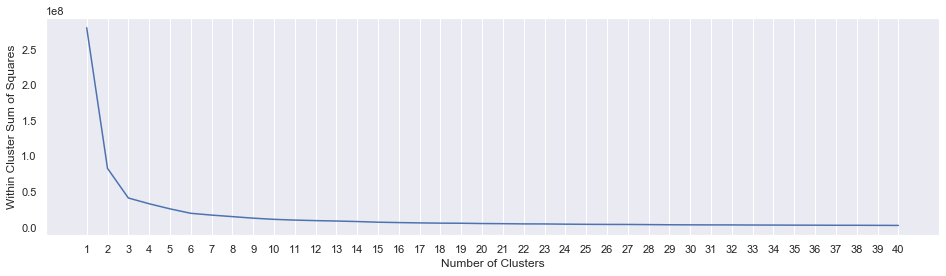

In [21]:
# Vary the Number of Clusters
min_clust = 1
max_clust = 40
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

In [22]:
# Import essential models from sklearn
from sklearn.cluster import KMeans

# Set "optimal" Clustering Parameters
num_clust = 3
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
# Print the Cluster Centers
cols = ["Features", "LATITUDE", "LONGITUDE", "NUMBER_OF_ENGINES", "TOTAL_FATAL_INJURIES", "TOTAL_SERIOUS_INJURIES", 
      "TOTAL_MINOR_INJURIES", "TOTAL_UNINJURED"]
lst = []

for i, center in enumerate(kmeans.cluster_centers_):
    val = []
    val.append("Cluster "+str(i))
    for coord in center:
        val.append(round(coord, 2))
    lst.append(val)
df = pd.DataFrame(lst, columns=cols)
df.head()

,Features,LATITUDE,LONGITUDE,NUMBER_OF_ENGINES,TOTAL_FATAL_INJURIES,TOTAL_SERIOUS_INJURIES,TOTAL_MINOR_INJURIES,TOTAL_UNINJURED
0,Cluster 0,38.51,-100.36,1.07,0.37,0.19,0.29,1.78
1,Cluster 1,0.46,0.93,1.08,0.68,0.22,0.33,1.92
2,Cluster 2,8.01,-19.69,2.02,0.13,0.52,2.41,189.05


Within Cluster Sum of Squares : 41057830.85237415



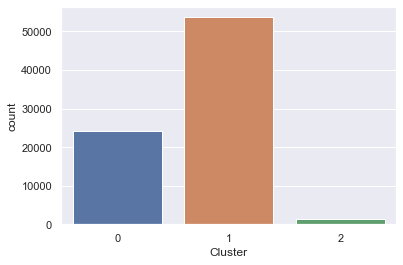

In [24]:
# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

# 1. Predict the make with the least number of accidents.

In [22]:
# aircraft manufacturer with least amount of injuries
df = pd.DataFrame(data)
# data cleaning
df["MAKE"].fillna(value = "UNKNOWN", inplace = True)
df['MAKE'] = df['MAKE'].str.upper()
df["TOTAL_FATAL_INJURIES"].fillna(value = "0", inplace = True)
df["TOTAL_SERIOUS_INJURIES"].fillna(value = "0", inplace = True)
df["TOTAL_MINOR_INJURIES"].fillna(value = "0", inplace = True)
df["TOTAL_UNINJURED"].fillna(value = "0", inplace = True)
df["NUMBER_OF_ENGINES"].fillna(value = "0", inplace = True)
df['MAKE'].replace(np.nan, 'Unknown', inplace = True)
df = df.astype({"TOTAL_FATAL_INJURIES":int,"TOTAL_SERIOUS_INJURIES":int,"TOTAL_MINOR_INJURIES":int,"TOTAL_UNINJURED":int,"NUMBER_OF_ENGINES":int})
# create a variable to indicate total overall injuries
df["TOTAL_INJURIES"] = df["TOTAL_FATAL_INJURIES"] + df["TOTAL_SERIOUS_INJURIES"] + df["TOTAL_MINOR_INJURIES"]
# sort values by total of injuries
df.sort_values(["TOTAL_INJURIES"], ascending = False)
# top five injuries records
df.head()

,EVENT_DATE,LOCATION,COUNTRY,LATITUDE,LONGITUDE,AIRPORT_CODE,AIRPORT_NAME,INJURY_SEVERITY,AIRCRAFT_DAMAGE,AIRCRAFT_CATEGORY,...,NUMBER_OF_ENGINES,ENGINE_TYPE,PURPOSE_OF_FLIGHT,TOTAL_FATAL_INJURIES,TOTAL_SERIOUS_INJURIES,TOTAL_MINOR_INJURIES,TOTAL_UNINJURED,WEATHER_CONDITION,BROAD_PHASE_OF_FLIGHT,TOTAL_INJURIES
0,14/11/2016,"Winton, New Zealand",New Zealand,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Helicopter,...,1,Turbo Shaft,NaN,0,0,0,1,NaN,MANEUVERING,0
1,14/11/2016,"Albrook, Panama",Panama,NaN,NaN,MPMG,Marcos A. Gelabert Intl.,Non-Fatal,Substantial,Airplane,...,0,NaN,NaN,0,0,0,2,VMC,LANDING,0
2,13/11/2016,"Port Allen, LA",United States,30.532500,-91.3150,LA46,OMNI,Non-Fatal,Substantial,Airplane,...,1,Reciprocating,Personal,0,0,0,1,VMC,TAKEOFF,0
3,12/11/2016,"Taylor, AZ",United States,34.454722,-110.0575,NaN,NaN,Non-Fatal,Substantial,Airplane,...,1,Reciprocating,Instructional,0,0,0,2,VMC,MANEUVERING,0
4,12/11/2016,"Pleasanton, TX",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Airplane,...,1,Reciprocating,Personal,0,1,0,1,VMC,NaN,1


In [23]:
# top five location has highest rate of accidents
df.loc[~df['MAKE'].astype(str).str.isdigit()]

,EVENT_DATE,LOCATION,COUNTRY,LATITUDE,LONGITUDE,AIRPORT_CODE,AIRPORT_NAME,INJURY_SEVERITY,AIRCRAFT_DAMAGE,AIRCRAFT_CATEGORY,...,NUMBER_OF_ENGINES,ENGINE_TYPE,PURPOSE_OF_FLIGHT,TOTAL_FATAL_INJURIES,TOTAL_SERIOUS_INJURIES,TOTAL_MINOR_INJURIES,TOTAL_UNINJURED,WEATHER_CONDITION,BROAD_PHASE_OF_FLIGHT,TOTAL_INJURIES
0,14/11/2016,"Winton, New Zealand",New Zealand,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Helicopter,...,1,Turbo Shaft,NaN,0,0,0,1,NaN,MANEUVERING,0
1,14/11/2016,"Albrook, Panama",Panama,NaN,NaN,MPMG,Marcos A. Gelabert Intl.,Non-Fatal,Substantial,Airplane,...,0,NaN,NaN,0,0,0,2,VMC,LANDING,0
2,13/11/2016,"Port Allen, LA",United States,30.532500,-91.315000,LA46,OMNI,Non-Fatal,Substantial,Airplane,...,1,Reciprocating,Personal,0,0,0,1,VMC,TAKEOFF,0
3,12/11/2016,"Taylor, AZ",United States,34.454722,-110.057500,NaN,NaN,Non-Fatal,Substantial,Airplane,...,1,Reciprocating,Instructional,0,0,0,2,VMC,MANEUVERING,0
4,12/11/2016,"Pleasanton, TX",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Airplane,...,1,Reciprocating,Personal,0,1,0,1,VMC,NaN,1
5,10/11/2016,"Blairstown, NJ",United States,40.971111,-74.997500,1N7,Blairstown,Fatal(1),Substantial,Airplane,...,1,Reciprocating,Ferry,1,0,0,0,VMC,STANDING,1
6,9/11/2016,"Crescent City, FL",United States,29.408056,-81.514444,16FD,SKINNERS WHOLESALE NURSERY,Fatal(2),Destroyed,Airplane,...,1,Reciprocating,Instructional,2,0,0,0,VMC,MANEUVERING,2
7,6/11/2016,"Twentynine Palms, CA",United States,34.160000,-115.997500,2CA3,CROSSWINDS,Non-Fatal,Substantial,Airplane,...,0,NaN,Personal,0,0,0,1,VMC,LANDING,0
8,6/11/2016,"Royalton, WI",United States,44.383334,88.852500,38WI,Northport Airport,Non-Fatal,Destroyed,Airplane,...,1,Reciprocating,Personal,0,0,1,0,VMC,APPROACH,1
9,6/11/2016,"San Marcos, TX",United States,29.890000,-97.858611,HYI,SAN MARCOS REGIONAL,Non-Fatal,Substantial,Airplane,...,1,Reciprocating,Personal,0,0,2,0,VMC,TAKEOFF,2


In [24]:
# Add variable count to find the total number of occurence
df["COUNT"] = 1
# Group dataset by Make and get total of the numerical values
makegrp = df.groupby(['MAKE'], as_index=False).sum()
# Capture only makes that occurs more than 500 times
top5 = makegrp[~(makegrp['COUNT'] < 500)]
# Create Total to get total injuries and total uninjured
top5["TOTAL"] = top5["TOTAL_INJURIES"] + top5["TOTAL_UNINJURED"]
# Capture only 4 important columns
top5 = top5[["MAKE","TOTAL_INJURIES","TOTAL_UNINJURED","TOTAL"]]
# Get Ratio by dividing total injuries with count
top5["RATIO"] = top5["TOTAL_INJURIES"]/top5["TOTAL"]
# Sort by ratio
top5 = top5.sort_values(["RATIO"], ascending = True)
# Reset index
top5 = top5.reset_index(drop=True)
# Get only top 5
top5 = top5.head(5)
top5.head()

C:\Users\v\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,MAKE,TOTAL_INJURIES,TOTAL_UNINJURED,TOTAL,RATIO
0,BOEING,12257,176324,188581,0.064996
1,MCDONNELL DOUGLAS,3440,43784,47224,0.072844
2,MAULE,240,741,981,0.244648
3,GRUMMAN,642,1207,1849,0.347215
4,SCHWEIZER,383,647,1030,0.371845


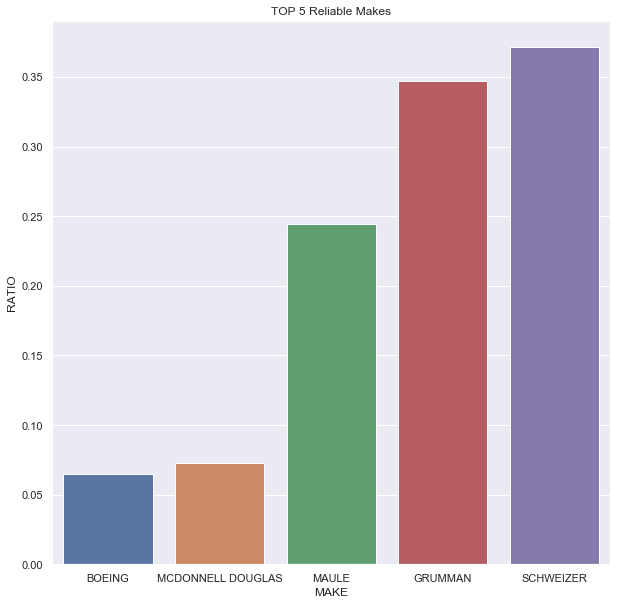

In [25]:
# visualizing in the form of barchart 
fig, axes = plt.subplots(1, 1, figsize = (10, 10))
plt.title("TOP 5 Reliable Makes")
sb.barplot(x = "MAKE",y = "RATIO", data = top5)

## Classification Decision Training model with all 5 categorical variables

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.33064821834723274

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.324467749068166



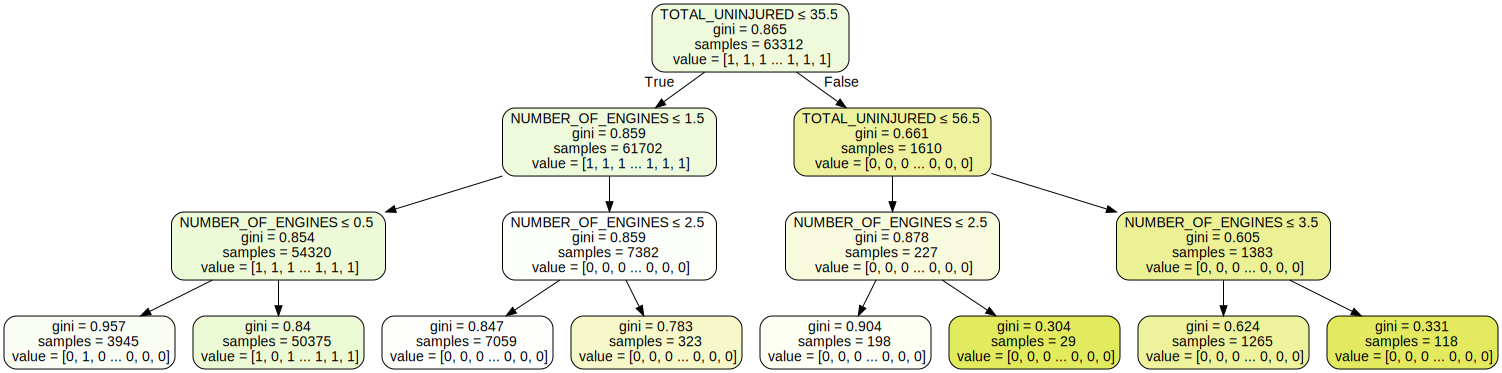

In [26]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
predictors = ['NUMBER_OF_ENGINES','TOTAL_FATAL_INJURIES','TOTAL_SERIOUS_INJURIES','TOTAL_MINOR_INJURIES','TOTAL_UNINJURED']

y = pd.DataFrame(df['MAKE'])
X = pd.DataFrame(df[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

 As can observed, **NUMBER_OF_ENGINE** and **TOTAL_UNINJURED** are 2 quite important variables to predict the make. Next, we will use the classification tree to predict which factor could predict make more efficiently.

### Predict MAKE using NUMBER_OF_ENGINE

In [27]:
make = pd.DataFrame(df['MAKE'])                          # Response
total_injuries = pd.DataFrame(df['NUMBER_OF_ENGINES'])      # Predictor

In [28]:
X = df[["MAKE"]].copy()
y = df["NUMBER_OF_ENGINES"].copy()

In [29]:
from sklearn.model_selection import train_test_split
# Train Set : 80%; Test Set : 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [30]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

# Extract the two variables X_train and y_train
y_train = pd.DataFrame(df['MAKE'])
X_train = pd.DataFrame(df['NUMBER_OF_ENGINES'])

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

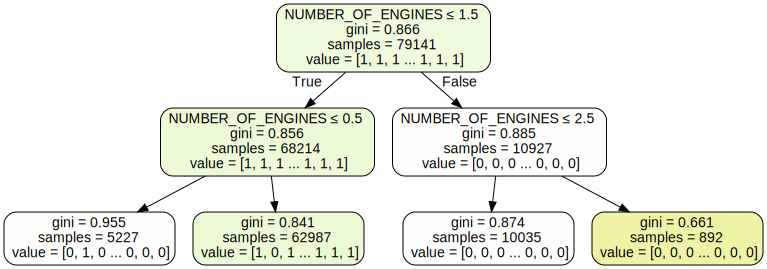

In [31]:
# Plot the Decision Tree
from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

import graphviz
graphviz.Source(treedot)

In [32]:
# Predict Make corresponding to Total Injuries
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

Classification Accuracy 	: 0.3196067777763738


### Predict MAKE using TOTAL_UNINJURED

In [33]:
make = pd.DataFrame(df['MAKE'])                            # Response
total_uninjured = pd.DataFrame(df['TOTAL_UNINJURED'])      # Predictor

X = df[["MAKE"]].copy()
y = df["TOTAL_UNINJURED"].copy()

In [34]:
from sklearn.model_selection import train_test_split
# Train Set : 80%; Test Set : 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [35]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

# Extract the two variables X_train and y_train
y_train = pd.DataFrame(df['MAKE'])
X_train = pd.DataFrame(df['TOTAL_UNINJURED'])

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

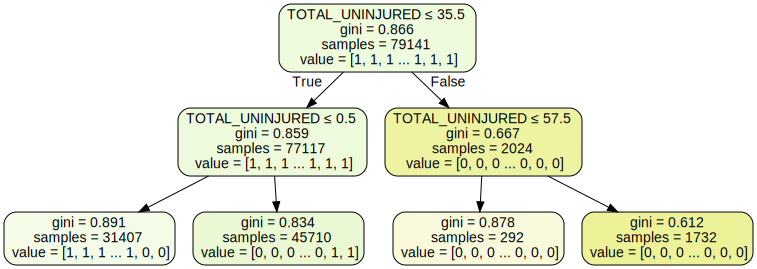

In [36]:
# Plot the Decision Tree
from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

import graphviz
graphviz.Source(treedot)

In [37]:
# Predict Make corresponding to Total Uninjured
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

Classification Accuracy 	: 0.3273903539252726


### - As could be observed, as achieving better accuracy compared to number of engines, total uninjured could be used to predict the MAKE much better. 

### - However, as the accuracy is not so high (around 0.3), hence, this could derive that the MAKE somehow hard to be predict. 

# 2. Predict the severity of the accidents

- Predict the **AIRCRAFT_DAMAGE** base on the **INJURY_SEVERITY**, **WEATHER_CONDITION**.

- The neural network model in sklearn is utilized in this case with **2 hidden layers** for the sake of simplicity.

- Will iterating through (m, n) which is the synopsis in first and second hidden layers respectively inorder to find which is the most suitable m, n for the model.

In [38]:
# aircraft damage statistic information
data["AIRCRAFT_DAMAGE"].describe()

count           76742
unique              3
top       Substantial
freq            56939
Name: AIRCRAFT_DAMAGE, dtype: object

In [39]:
# injury statistic information
data["INJURY_SEVERITY"].describe()

count         79141
unique          124
top       Non-Fatal
freq          59929
Name: INJURY_SEVERITY, dtype: object

## Divide the data into training set and test set

- **80%** data used for training; the remaining used for testing.

- For those categorical column used for prediction, using the **Label Encoder** for encoding those data into numerical value.


In [40]:
# divide the data into test set and training set (20%:80%)
# train 2 models to solve the same problem: Classification Tree & Dendrogram
X = data[["INJURY_SEVERITY", "WEATHER_CONDITION"]].copy()
X.fillna(value = "0", inplace = True) # Fill missing values in data
y = data["AIRCRAFT_DAMAGE"].copy()
y.fillna(value = "Substantial", inplace = True)
# data cleaning and converting categorical variables to numerical values
X["INJURY_SEVERITY"] = LabelEncoder().fit_transform(X["INJURY_SEVERITY"].astype("str")) 
X["WEATHER_CONDITION"] = LabelEncoder().fit_transform(X["WEATHER_CONDITION"].astype("str")) 
# divide the data to test set and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 
# assertion test
assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

## Neural Network model applied prediction

In [41]:
from sklearn.neural_network import MLPClassifier

## Choosing suitable hidden layer sizes parameters

- For the sake of simplicity, in this case, we will merely consider the neural network with 2 hidden layers, one hidden layer with m synopses in first hidden layer and n synopses in the second hidden layer.

- By training different 2 hidden layers - neural network with different m, n parameters, we will find which is the most suitable m, n should use for prediction the fatality of the accident. 

m = 4 and n = 3 is optimal value for training dataset with accuracy = 0.8426680566085418
m = 4 and n = 3 is optimal value for test dataset with accuracy = 0.8460420746730685


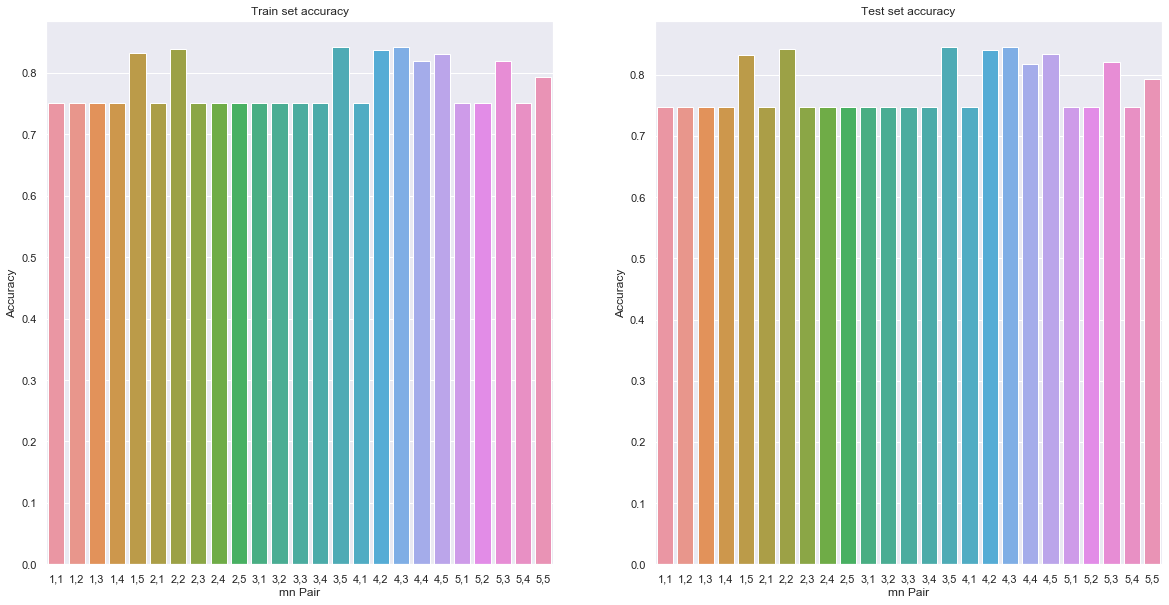

In [42]:
mn = []
train_scores = []
test_scores = []
max_score_for_train = 0
max_score_for_test = 0
# m, n values of train and test set that the model with hidden_layers(m, n) performed most accuracy
m_train, m_test, n_train, n_test = 1, 1, 1, 1 
# the parameters ranging from 1 to 5
for m in range(1, 6):
    for n in range(1, 6):
        mlp = MLPClassifier(solver = "lbfgs", alpha = 1e-5, hidden_layer_sizes = (m , n), random_state = 1)
        mlp.fit(X_train, y_train)
        mn.append("{},{}".format(m, n))
        # for training set
        train_score = mlp.score(X_train, y_train)
        train_scores.append(train_score)
        if max_score_for_train < train_score:
            max_score_for_train = train_score
            m_train , n_train = m, n
        # for test set
        test_score = mlp.score(X_test, y_test)
        test_scores.append(test_score)
        if max_score_for_test < test_score:
            max_score_for_test = test_score
            m_test , n_test = m, n

# training dataset analysis 
print("m = {} and n = {} is optimal value for training dataset with accuracy = {}".format(m_train,n_train, max_score_for_train))                         
print("m = {} and n = {} is optimal value for test dataset with accuracy = {}".format(m_test,n_test, max_score_for_test))
f, axes = plt.subplots(1, 2, figsize = (20, 10))
# train set and test set accuracy plotting for different m, n values 
# train set
sb.barplot(x = mn, y = train_scores, ax = axes[0])
axes[0].set_title("Train set accuracy")
axes[0].set_xlabel("mn Pair")
axes[0].set_ylabel("Accuracy")
# test set
sb.barplot(x = mn, y = test_scores, ax = axes[1])
axes[1].set_title("Test set accuracy")
axes[1].set_xlabel("mn Pair")
axes[1].set_ylabel("Accuracy")

plt.show()

## Comments:

- For this problem,

+) With training set, when m = 4, n = 3, it achieved most accuracy compared to others.

+) However, with the test set, while m = 3, n = 5 achieved most accuracy, however, when m = n = 1, its model somehow perform comparable to those higher layer without too much heavy computations.

### The combination of both weather condition and injury severity could be well - predict the aircraft damage with the accuracy more than 80%. 

# 3. Which accident(s) are outliers compared to others.

#### Used 'Purpose of Flight' as cause of accident, since it is why the aircraft is flown in the 1st place.

In [43]:
# Fill missing values in data
data.fillna(value = "0", inplace = True)

# Check missing values in data
data.isnull().sum()

EVENT_DATE                0
LOCATION                  0
COUNTRY                   0
LATITUDE                  0
LONGITUDE                 0
AIRPORT_CODE              0
AIRPORT_NAME              0
INJURY_SEVERITY           0
AIRCRAFT_DAMAGE           0
AIRCRAFT_CATEGORY         0
MAKE                      0
MODEL                     0
AMATEUR_BUILT             0
NUMBER_OF_ENGINES         0
ENGINE_TYPE               0
PURPOSE_OF_FLIGHT         0
TOTAL_FATAL_INJURIES      0
TOTAL_SERIOUS_INJURIES    0
TOTAL_MINOR_INJURIES      0
TOTAL_UNINJURED           0
WEATHER_CONDITION         0
BROAD_PHASE_OF_FLIGHT     0
dtype: int64

In [44]:
# Find out the unique variables that causes accidents
data['PURPOSE_OF_FLIGHT'].unique()

array(['0', 'Personal', 'Instructional', 'Ferry', 'Flight Test',
       'Aerial Application', 'Air Race/Show', 'Business', 'Positioning',
       'Unknown', 'Skydiving', 'External Load', 'Public Aircraft - Local',
       'Glider Tow', 'Public Aircraft - State', 'Public Aircraft',
       'Other Work Use', 'Air Drop', 'Aerial Observation', 'Banner Tow',
       'Public Aircraft - Federal', 'Executive/Corporate', 'Firefighting'],
      dtype=object)

In [45]:
# Replacing variables with numeric representation
data['PURPOSE_OF_FLIGHT'] = data['PURPOSE_OF_FLIGHT'].replace({'N/A': 0,
                                                              'Personal': 1,
                                                              'Instructional': 2,
                                                              'Ferry': 3,
                                                              'Flight Test': 4,
                                                              'Aerial Application': 5,
                                                              'Air Race/Show': 6,
                                                              'Business': 7,
                                                              'Positioning': 8,
                                                              'Unknown': 9,
                                                              'Skydiving': 10,
                                                              'External Load': 11,
                                                              'Public Aircraft - Local': 12,
                                                              'Glider Tow': 13,
                                                              'Public Aircraft - State': 14,
                                                              'Public Aircraft': 15,
                                                              'Other Work Use': 16,
                                                              'Air Drop': 17,
                                                              'Aerial Observation': 18,
                                                              'Banner Tow': 19,
                                                              'Public Aircraft - Federal': 20,
                                                              'Executive/Corporate': 21,
                                                              'Firefighting': 22})

In [46]:
print(data['PURPOSE_OF_FLIGHT'])

0        0
1        0
2        1
3        2
4        1
5        3
6        2
7        1
8        1
9        1
10       4
11       5
12       1
13       1
14       0
15       1
16       1
17       6
18       1
19       5
20       1
21       1
22       1
23       1
24       5
25       0
26       1
27       1
28       1
29       3
        ..
79111    1
79112    1
79113    1
79114    1
79115    1
79116    3
79117    7
79118    1
79119    1
79120    1
79121    1
79122    1
79123    1
79124    1
79125    1
79126    2
79127    1
79128    9
79129    1
79130    1
79131    7
79132    1
79133    1
79134    1
79135    1
79136    1
79137    1
79138    1
79139    1
79140    1
Name: PURPOSE_OF_FLIGHT, Length: 79141, dtype: object


In [47]:
# Extract variables needed from data set.
anamolyData = pd.DataFrame(data[["PURPOSE_OF_FLIGHT", "TOTAL_FATAL_INJURIES", "TOTAL_SERIOUS_INJURIES", "TOTAL_MINOR_INJURIES", "TOTAL_UNINJURED"]])

# Converting dtype
odd = anamolyData.astype('int')

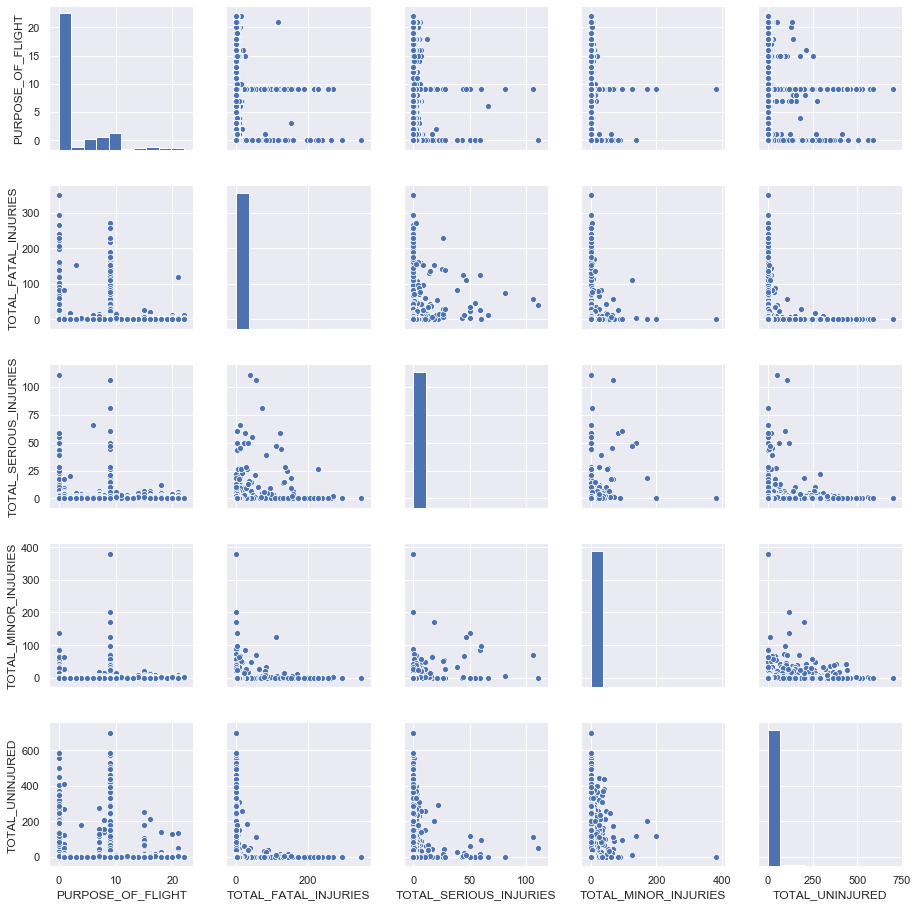

In [48]:
# Plot the Raw Data on 2D grids
sb.pairplot(odd)

In [49]:
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 50      # Number of Neighbors
cont_fraction = 0.1    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(odd)

LocalOutlierFactor(algorithm='auto', contamination=0.1, leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=50, novelty=False, p=2)

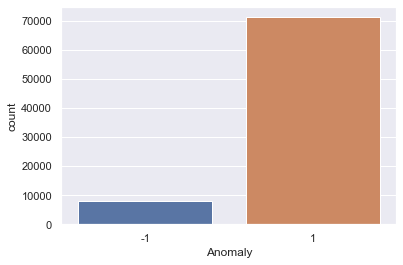

In [50]:
# Predict the Anomalies
labels = lof.fit_predict(odd)

# Append Labels to the Data
X_labeled = odd.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(X_labeled["Anomaly"])

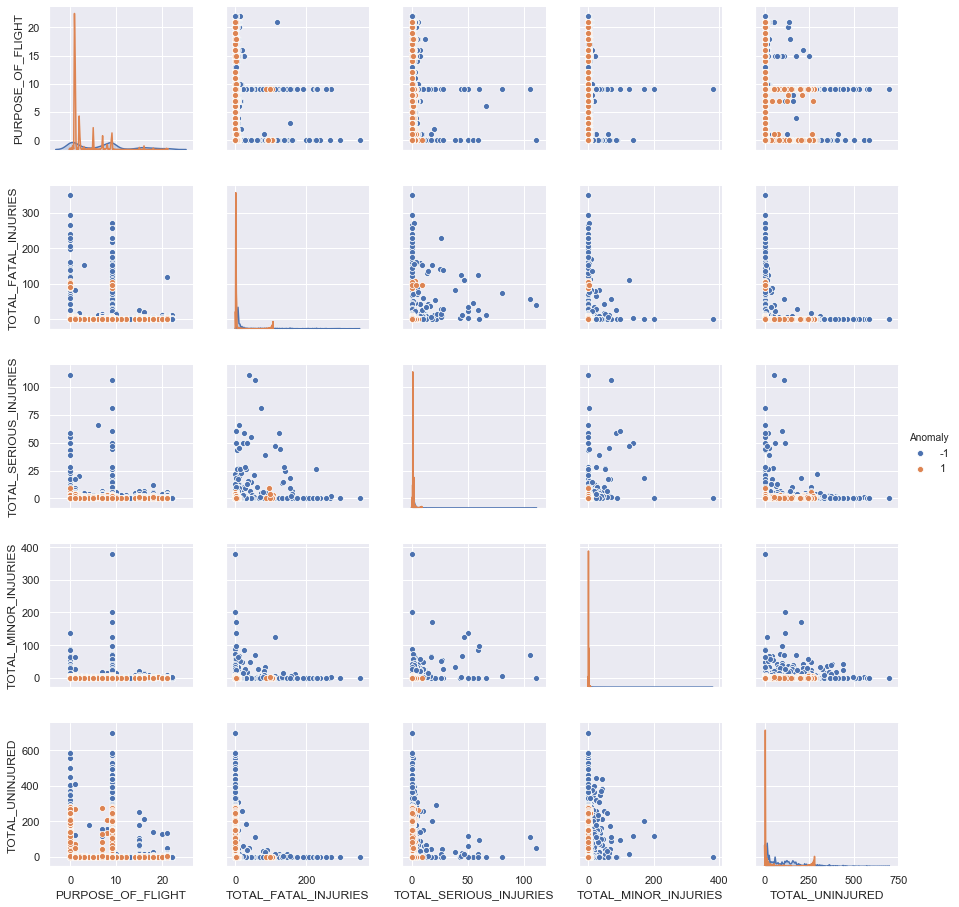

In [51]:
# Visualize the Anomalies in the Data
sb.pairplot(X_labeled, vars = odd.columns.values, hue = "Anomaly")

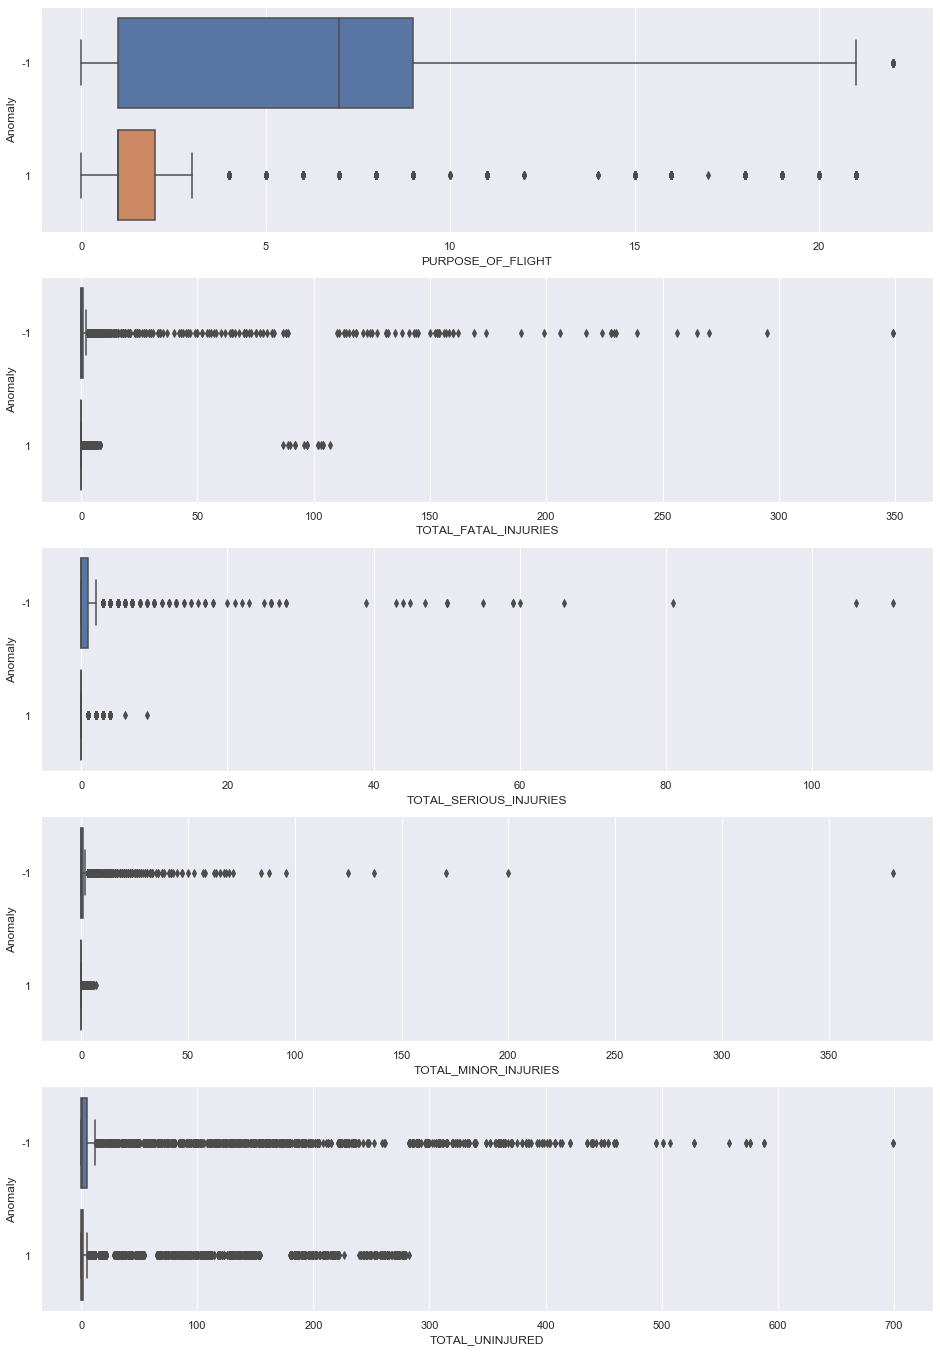

In [52]:
# Boxplots for all Features against the Anomalies
f, axes = plt.subplots(5, 1, figsize=(16,24))
sb.boxplot(x = 'PURPOSE_OF_FLIGHT', y = 'Anomaly', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'TOTAL_FATAL_INJURIES', y = 'Anomaly', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'TOTAL_SERIOUS_INJURIES', y = 'Anomaly', data = X_labeled, ax = axes[2])
sb.boxplot(x = 'TOTAL_MINOR_INJURIES', y = 'Anomaly', data = X_labeled, ax = axes[3])
sb.boxplot(x = 'TOTAL_UNINJURED', y = 'Anomaly', data = X_labeled, ax = axes[4])

In [53]:
from sklearn.neighbors import NearestNeighbors
# calculate the distance from each point to its closest neighbour using the NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(odd)
distances, indices = nbrs.kneighbors(odd)

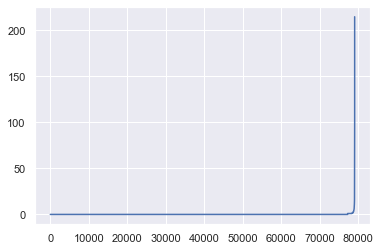

In [54]:
# Sort and plot result
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

The graph above works the same way as the elbow graph. By looking at the 'curve point' we will use the value for our 'eps' 
parameter in the DBSCAN. For this case, it is not very obvious but it is roughly about 1 if looked closely.

In [55]:
model = DBSCAN(eps=1, min_samples=10).fit(odd)
print (model)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)


In [56]:
# Show anomaly factors with -1 being anomaly
outlier = pd.DataFrame(odd)

print (Counter(model.labels_))

print (outlier[model.labels_==-1])

Counter({0: 76487, -1: 1653, 20: 216, 4: 84, 9: 79, 1: 56, 30: 55, 35: 41, 21: 37, 31: 36, 14: 24, 5: 22, 2: 21, 34: 21, 12: 20, 33: 20, 10: 19, 17: 17, 19: 13, 6: 13, 11: 13, 18: 13, 23: 13, 3: 12, 7: 12, 13: 12, 32: 12, 37: 12, 15: 11, 22: 11, 25: 11, 24: 10, 29: 10, 26: 9, 27: 9, 8: 8, 16: 7, 39: 7, 38: 6, 28: 5, 36: 4})
       PURPOSE_OF_FLIGHT  TOTAL_FATAL_INJURIES  TOTAL_SERIOUS_INJURIES  \
94                     0                     4                       6   
233                    0                     0                       0   
299                   17                     0                       0   
324                   16                     0                       4   
330                    0                     0                       0   
358                    0                     0                       1   
385                    7                    16                       0   
436                   17                     0                       0   
439     

Text(0.5, 1.0, 'DBSCAN')

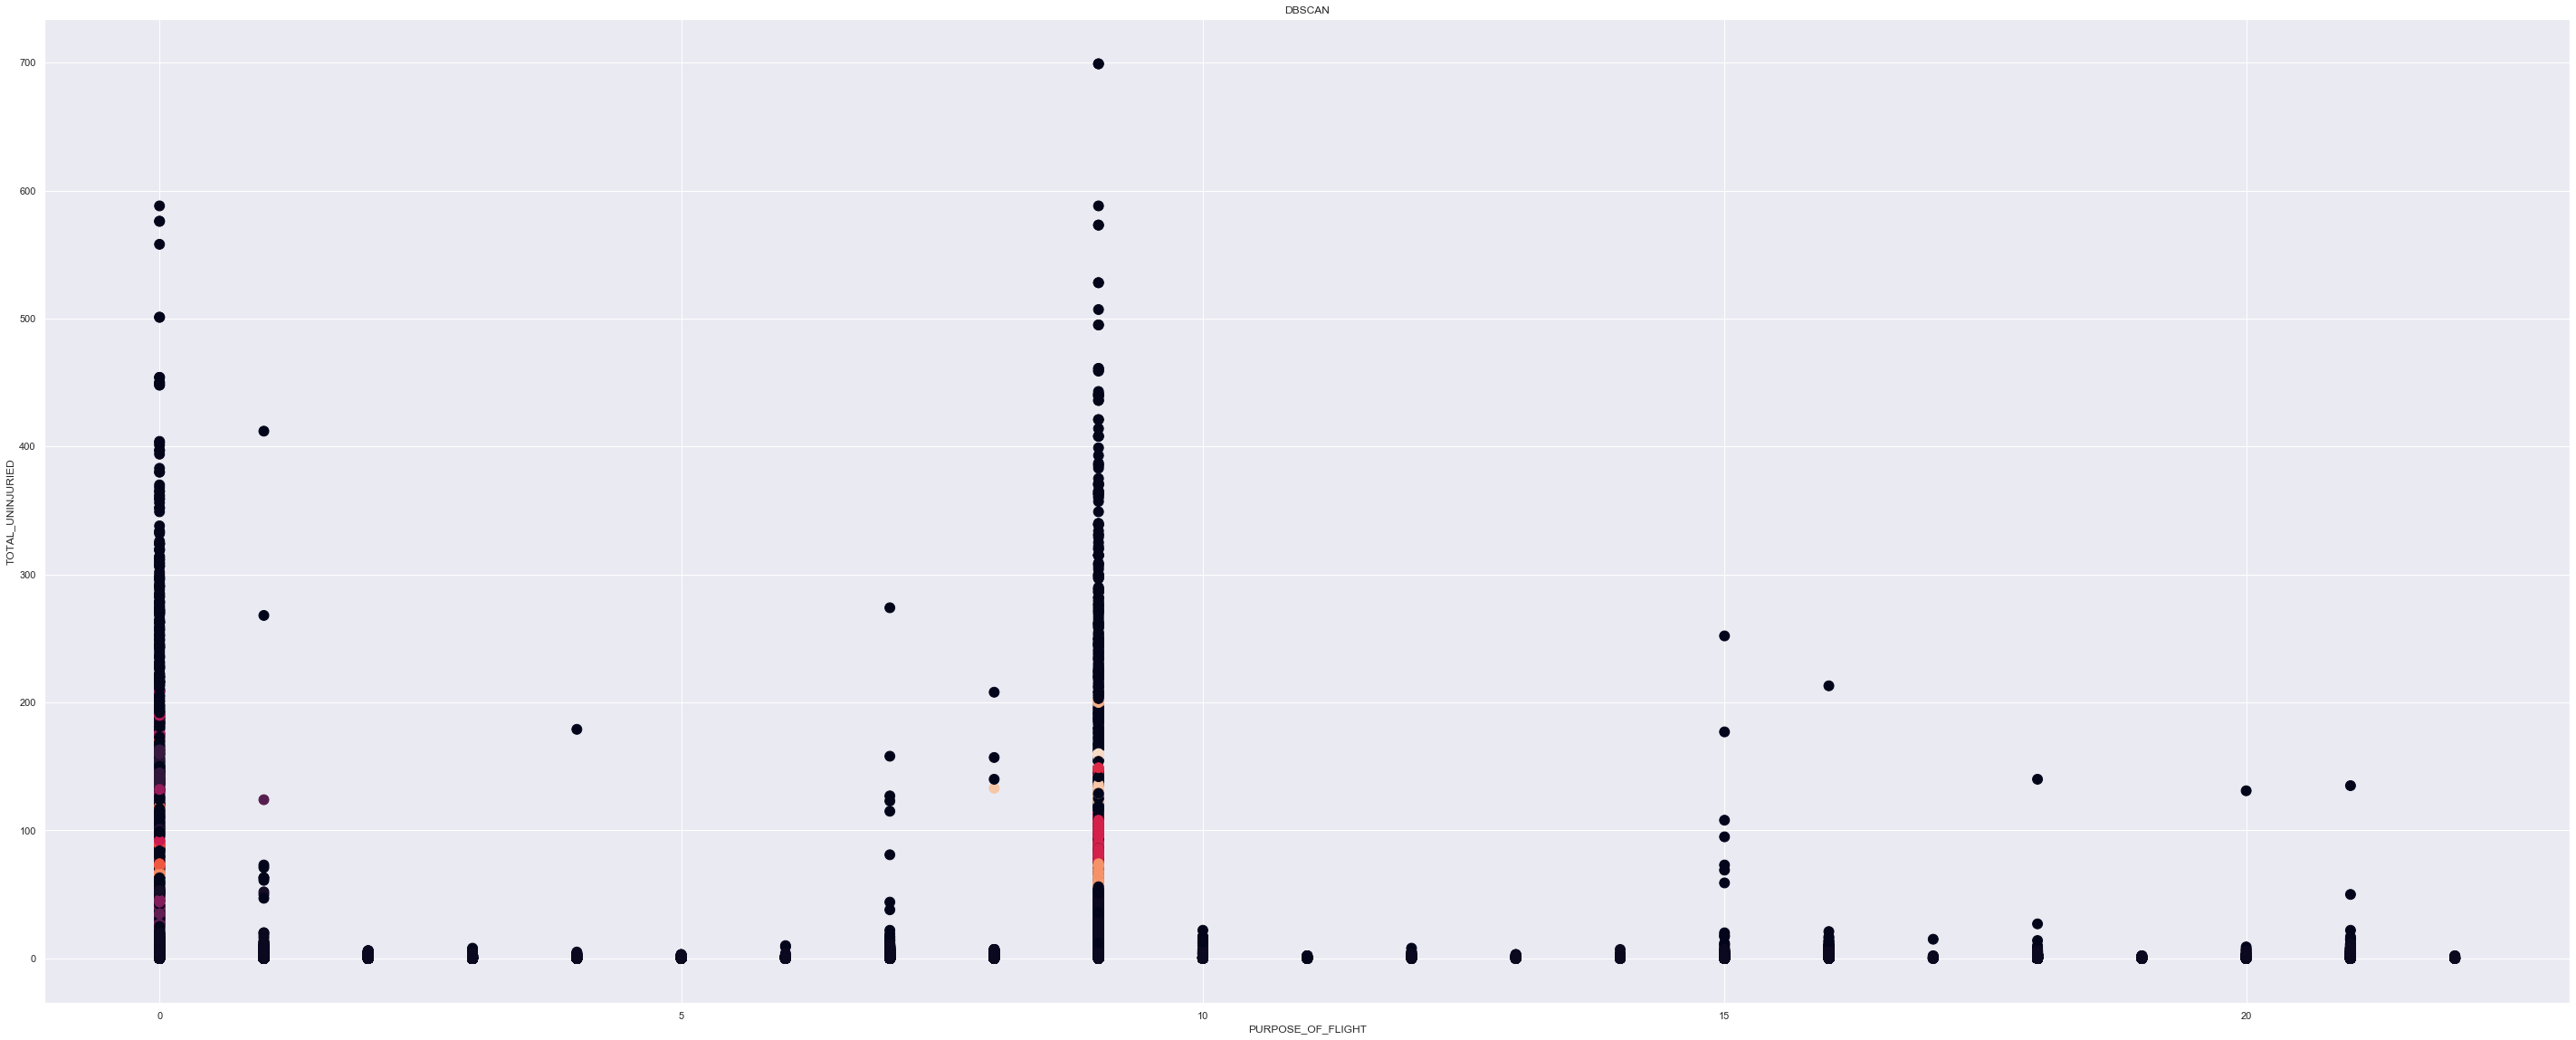

In [57]:
# Plot the graph
plt.gcf().set_size_inches(50, 20)

colors = model.labels_
plt.scatter(np.array(odd['PURPOSE_OF_FLIGHT']), np.array(odd['TOTAL_UNINJURED']), c=colors, s=120)

plt.xlabel('PURPOSE_OF_FLIGHT')
plt.ylabel('TOTAL_UNINJURIED')
plt.title('DBSCAN')

As seen from the plot above, index[0] and index[0] which reporesents 'N/A' and 'Unknown' are the ones with the most anomalies which makes sense, since you cannot really attribute the injuries a cause of accident if it 'N/A' or 'Unknown'.

Besides that, it may not be very clear but index[8] which represents 'Positioning' has an anomaly which indicates it could be a potential accident that does not belong to the data. However, it is just a single point, so it could also be ignored.


**Positioning: A positioning flight is a flight for the sole purpose of positioning the aircraft to conduct another flight from another airport. This is often done when the aircraft finishes its day in one city, but is needed in a different city the following day because another plane has broken down**